## US National Census (Income)

*About this Dataset*

**US Adult Census** (1994) relates income to social factors: 

- *age*: continuous.
- *workclass*: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
- *fnlwgt*: continuous.
- *education*: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
- *education-num*: continuous.
- *marital-status*: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
- *occupation*: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
- *relationship*: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
- *race*: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
- *sex*: Female, Male.
- *capital-gain*: continuous.
- *capital-loss*: continuous.
- *hours-per-week*: continuous.
- *native-country*: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

Each row is labelled as either having a salary greater than ">50K" or "<=50K".

Note: This Dataset was obtained from the UCI repository, it can be found on

https://archive.ics.uci.edu/ml/datasets/census+income, http://mlr.cs.umass.edu/ml/machine-learning-databases/adult/

### Preprocessing

In [6]:
from pathlib import Path
import os
import pandas as pd
import numpy as np
np.seterr(divide = 'ignore') 

from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import cross_val_predict
from scipy.stats import kstest

%run utils.py

path = Path(os.getcwd()).parent

columns = ['Age','Workclass','fnlgwt','Education','Education Num','Marital Status',
           'Occupation','Relationship','Race','Sex','Capital Gain','Capital Loss',
           'Hours/Week','Country','Above/Below 50K']

train = pd.read_csv(os.path.join(path, 'data/census_income/adult.data'), names=columns)
test = pd.read_csv(os.path.join(path, 'data/census_income/adult.test'), names=columns)
test = test.iloc[1:] # drop first row from test set

df = pd.concat([train, test])

In [7]:
df.replace(' >50K.', ' >50K', inplace=True)
df.replace(' <=50K.', ' <=50K', inplace=True)

df.dropna()
df.reset_index()

ctg = ['Workclass', 'Sex', 'Education', 'Marital Status', 
       'Occupation', 'Relationship', 'Race', 'Country'] # Categorical to Numerical

for c in ctg:
    df = pd.concat([df, pd.get_dummies(df[c], 
                                       prefix=c,
                                       dummy_na=False)], axis=1).drop([c],axis=1)

df_high = df[df['Above/Below 50K'] == " >50K"].copy(deep=True)
df_low = df[df['Above/Below 50K'] == " <=50K"].copy(deep=True)

### Experiment

- dropping only one instance at a time?
- how to find a good temperature value?
- https://www.sciencedirect.com/science/article/abs/pii/S0167865513000020


In [8]:
# Randomize data
df_low = df_low.reindex(np.random.permutation(df_low.index))
df_high = df_high.reindex(np.random.permutation(df_high.index))

rep = df.copy(deep=True)
non_rep = pd.concat([df_low.head(21000).copy(deep=True),
                     df_high.copy(deep=True)], sort=True)

print(rep['Above/Below 50K'].value_counts())
print(non_rep['Above/Below 50K'].value_counts())

rep['label'] = 0
non_rep['label'] = 1

 <=50K    37155
 >50K     11687
Name: Above/Below 50K, dtype: int64
 <=50K    21000
 >50K     11687
Name: Above/Below 50K, dtype: int64


## KS-Test and ROC-curve
The **Kolmogorov-Smirnov test** can be used to test the null hypothesis that the population distribution from which the data sample is drawn is a uniform distribution.

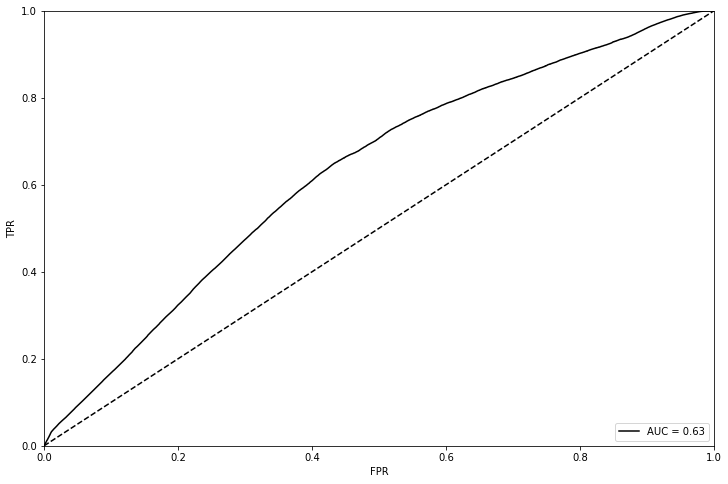

KstestResult(statistic=0.46240023915597817, pvalue=0.0)


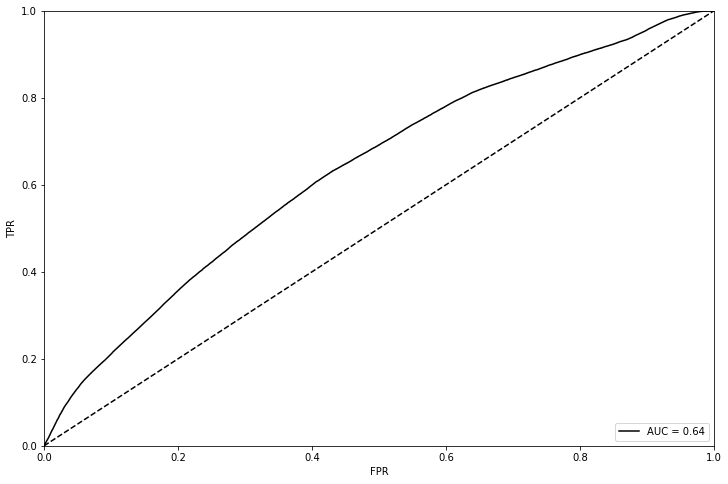

KstestResult(statistic=0.5207410569238513, pvalue=0.0)


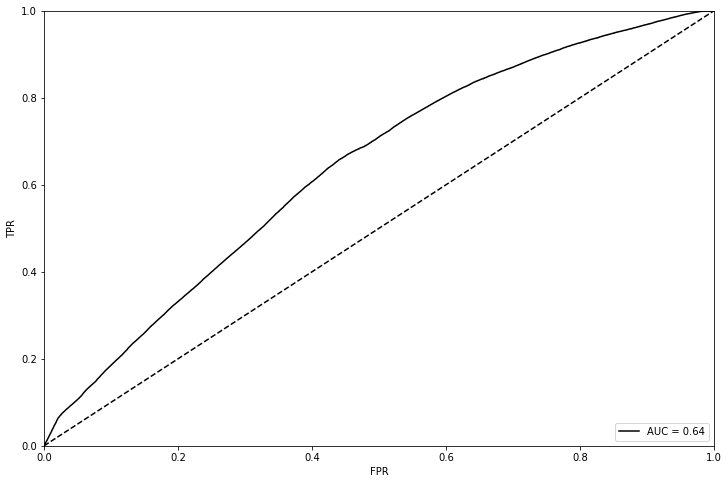

KstestResult(statistic=0.5156447125373559, pvalue=0.0)


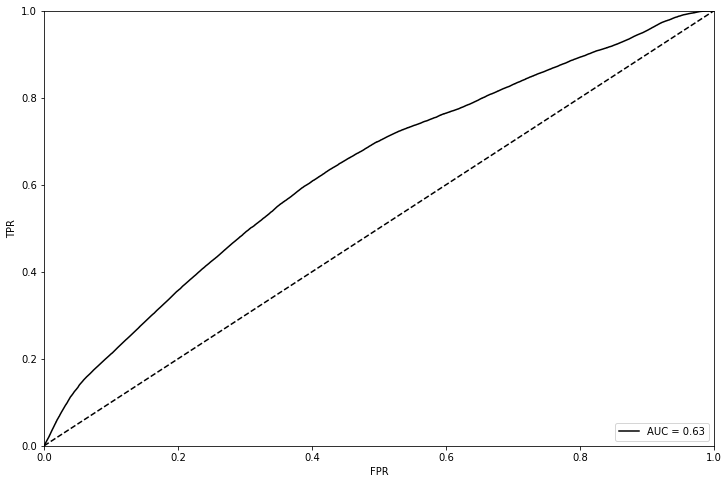

KstestResult(statistic=0.5193566556317804, pvalue=0.0)


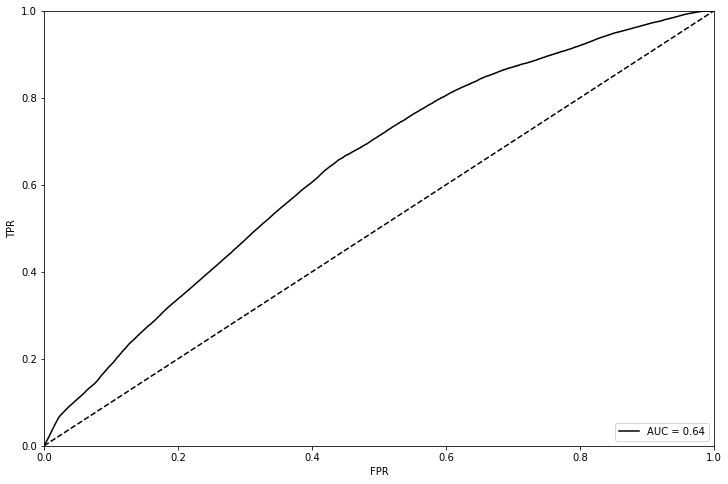

KstestResult(statistic=0.5189377398751928, pvalue=0.0)


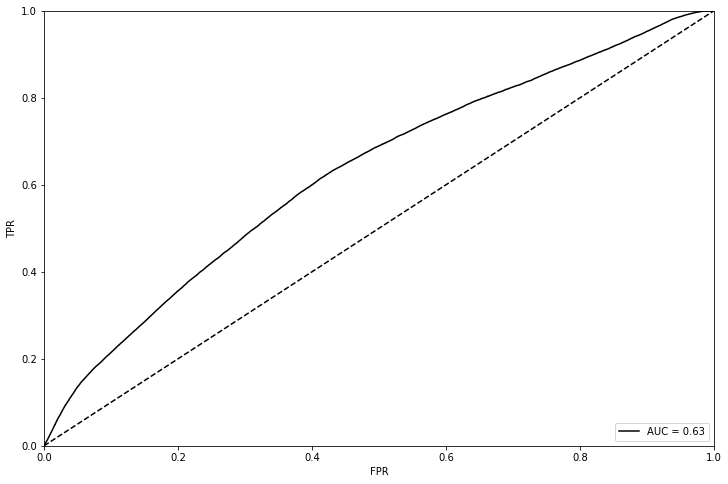

KstestResult(statistic=0.5265100397167305, pvalue=0.0)


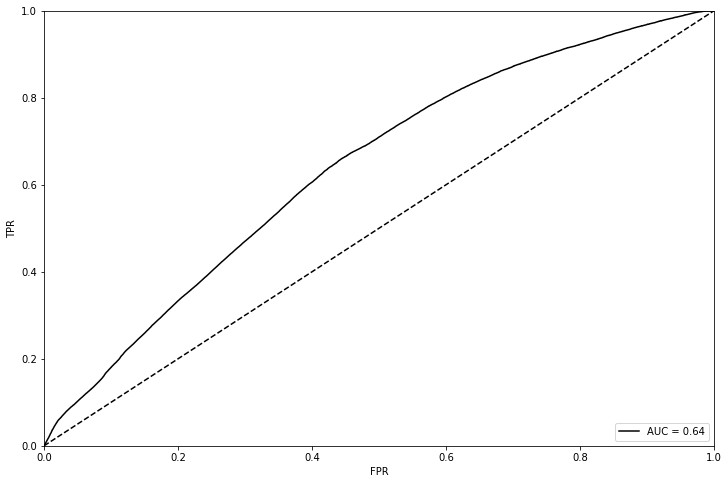

KstestResult(statistic=0.5244451085206143, pvalue=0.0)


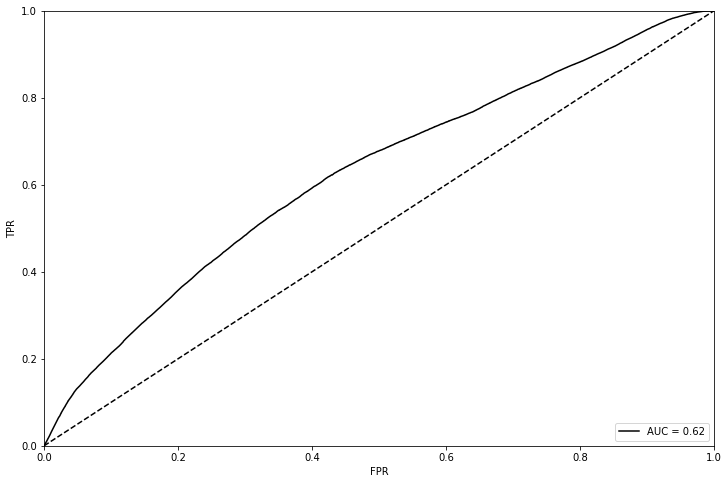

KstestResult(statistic=0.5189796826041005, pvalue=0.0)


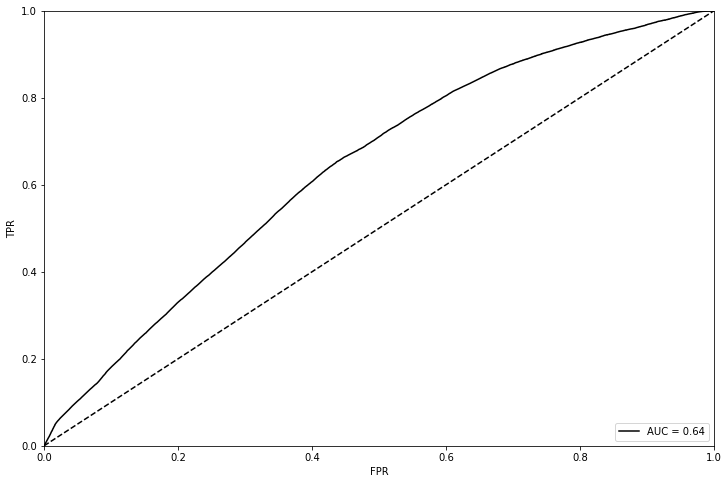

KstestResult(statistic=0.5125619970926931, pvalue=0.0)


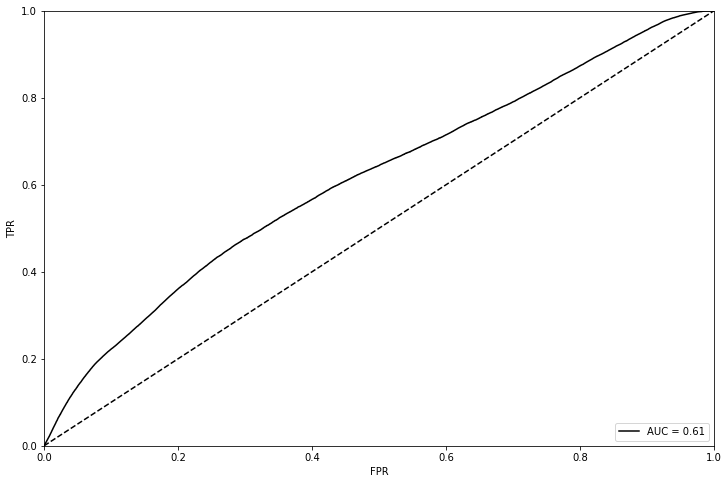

KstestResult(statistic=0.5157311995543635, pvalue=0.0)


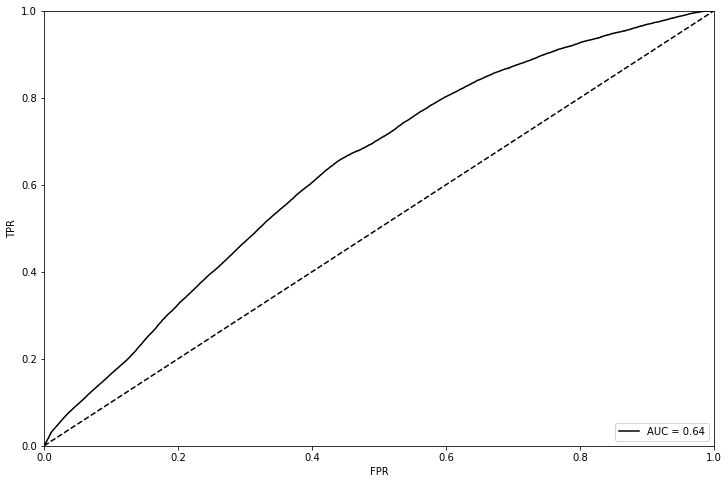

KstestResult(statistic=0.5061778001076712, pvalue=0.0)


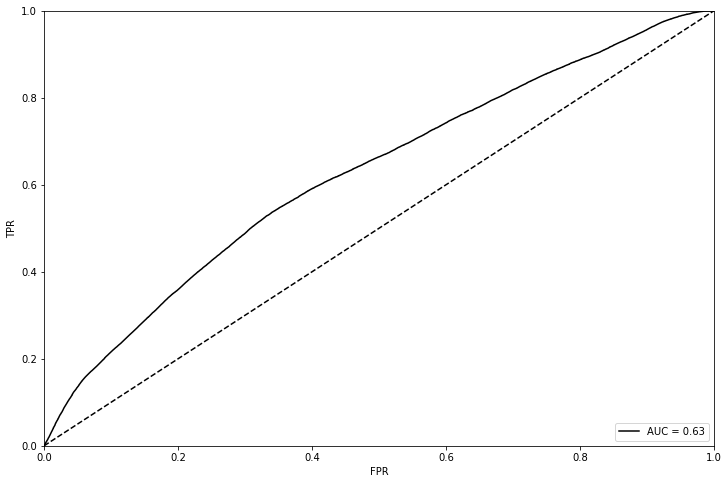

KstestResult(statistic=0.5147465154709664, pvalue=0.0)


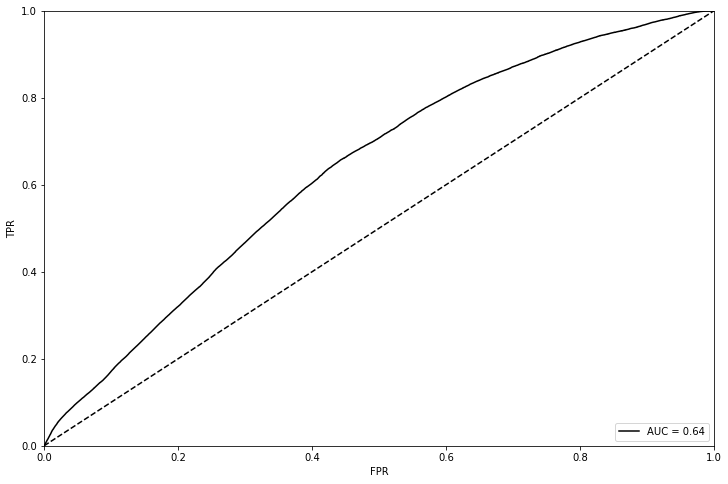

KstestResult(statistic=0.5181277430064384, pvalue=0.0)


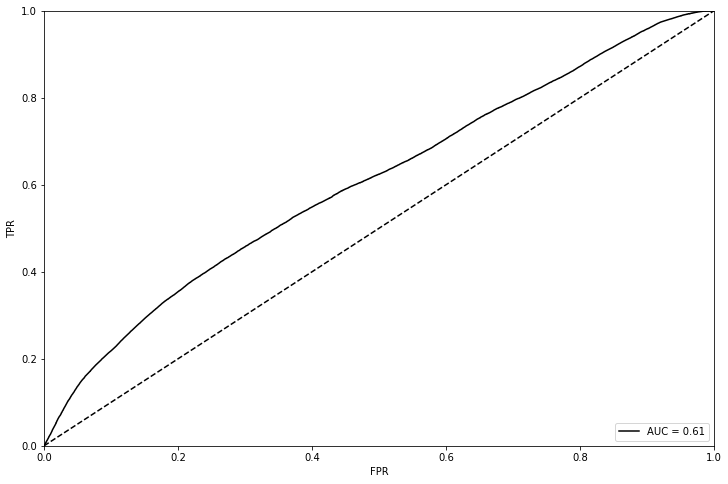

KstestResult(statistic=0.5100025825267094, pvalue=0.0)


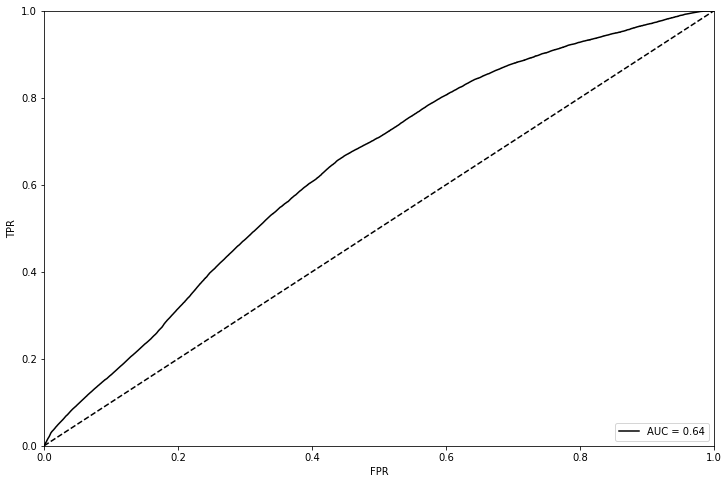

KstestResult(statistic=0.507639801999925, pvalue=0.0)


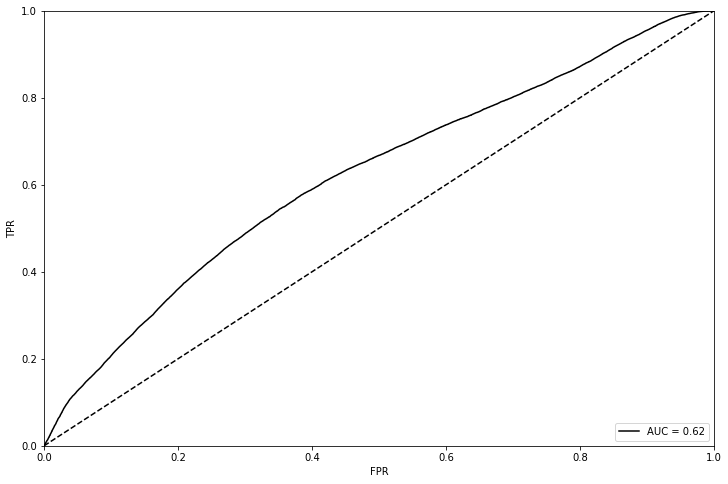

KstestResult(statistic=0.5207005474661625, pvalue=0.0)


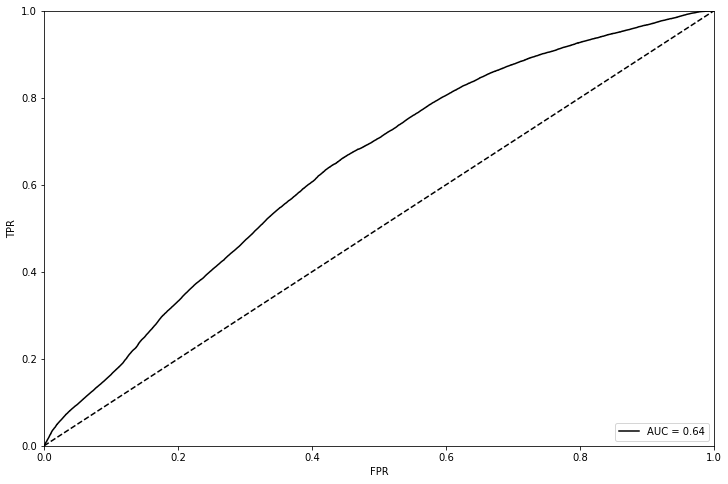

KstestResult(statistic=0.5039812111236828, pvalue=0.0)


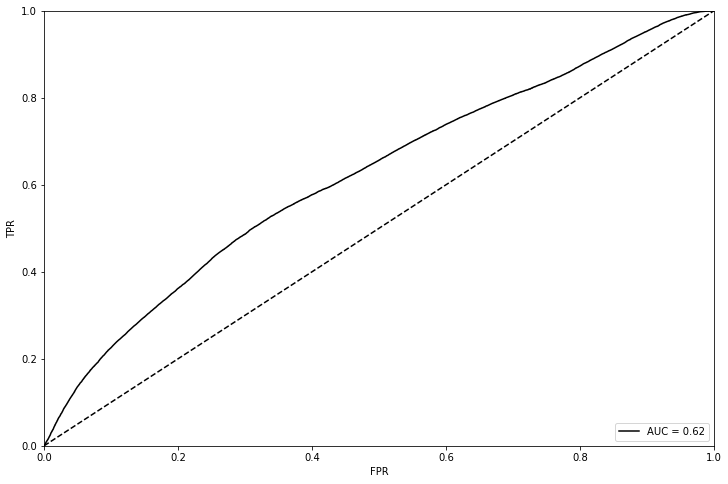

KstestResult(statistic=0.5189254617171883, pvalue=0.0)


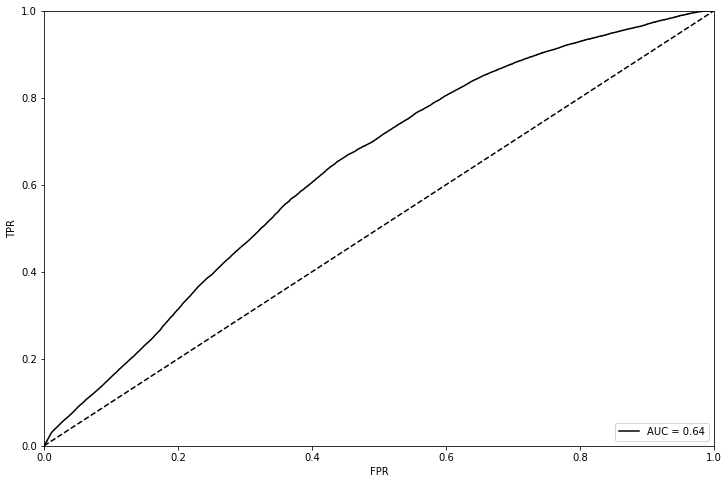

KstestResult(statistic=0.5174498154761102, pvalue=0.0)


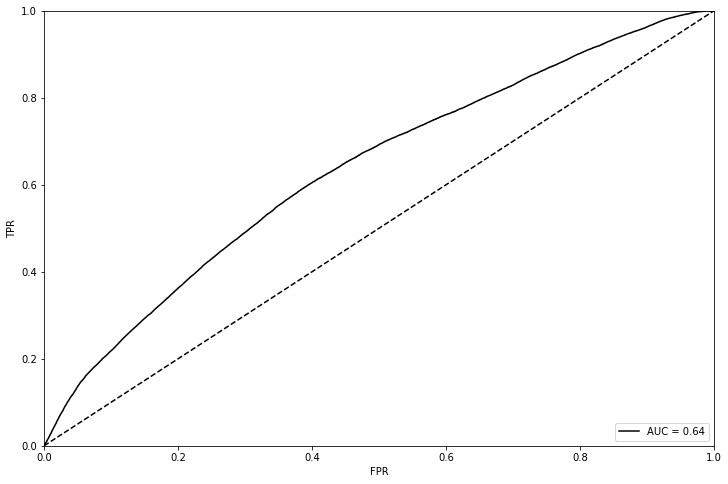

KstestResult(statistic=0.5096985053016455, pvalue=0.0)


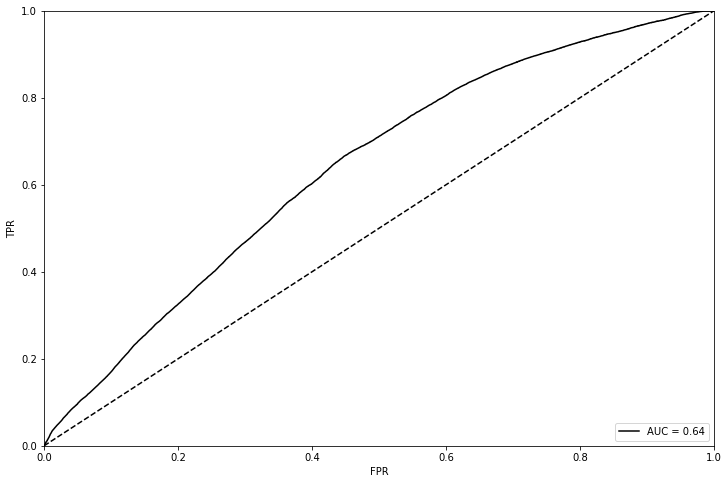

KstestResult(statistic=0.5150914405066209, pvalue=0.0)


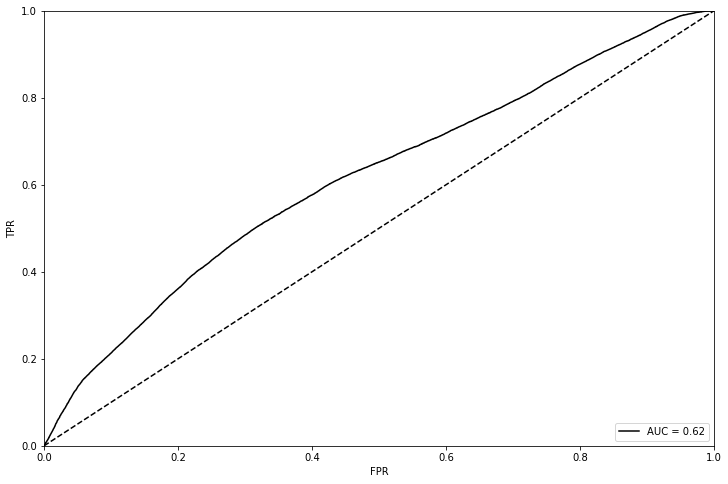

KstestResult(statistic=0.5147488418129262, pvalue=0.0)


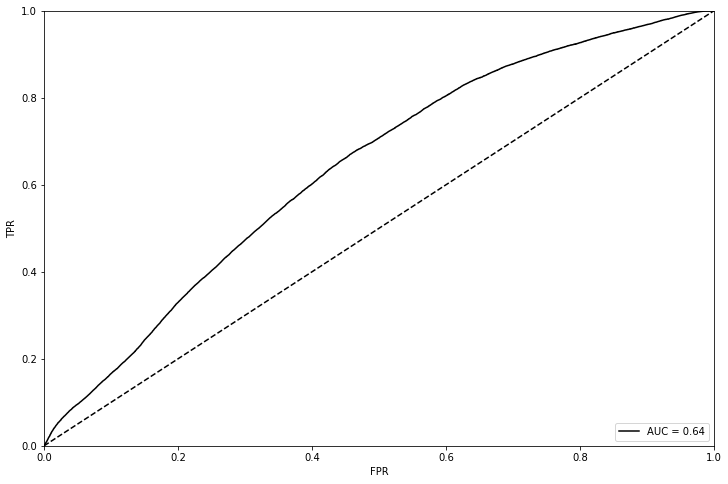

KstestResult(statistic=0.5119328462482654, pvalue=0.0)


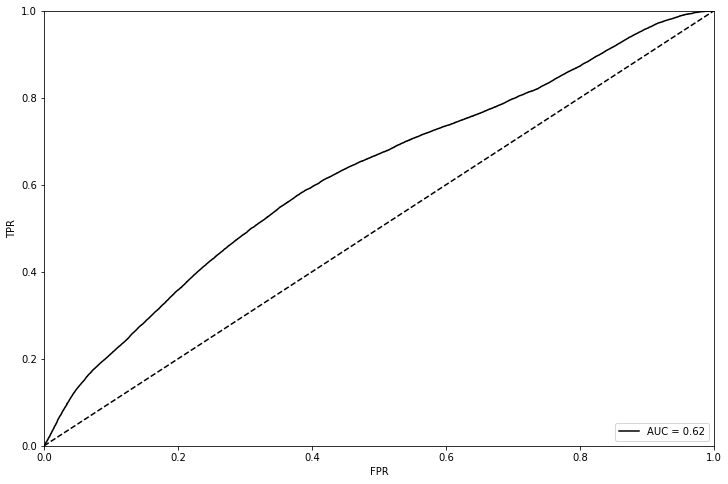

KstestResult(statistic=0.516689488635825, pvalue=0.0)


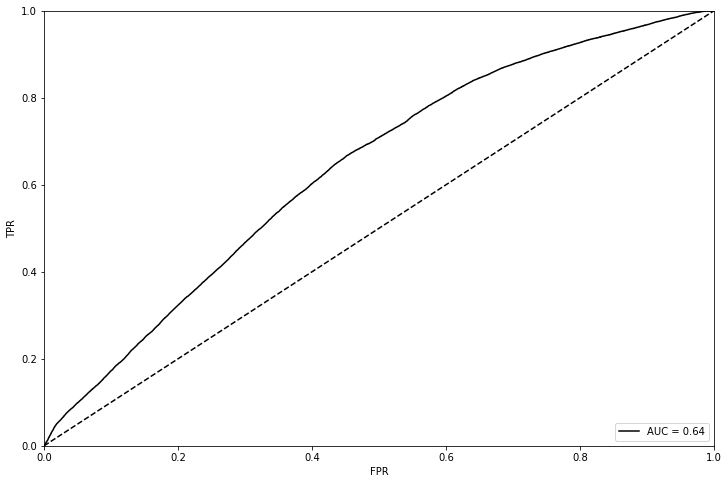

KstestResult(statistic=0.5151945947147053, pvalue=0.0)


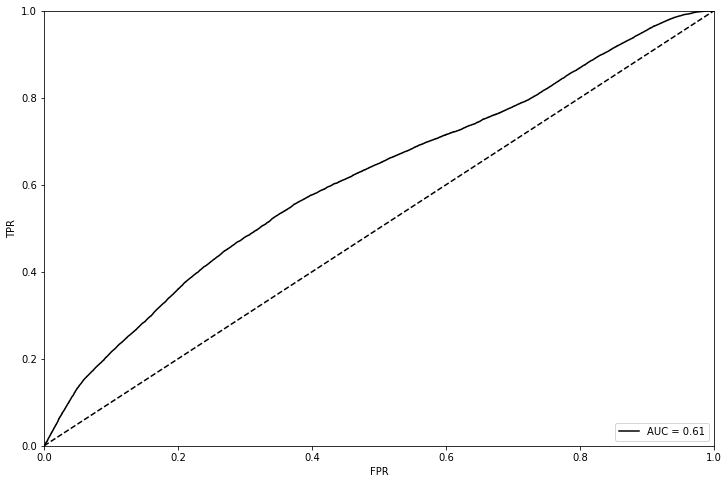

KstestResult(statistic=0.5136564254724264, pvalue=0.0)


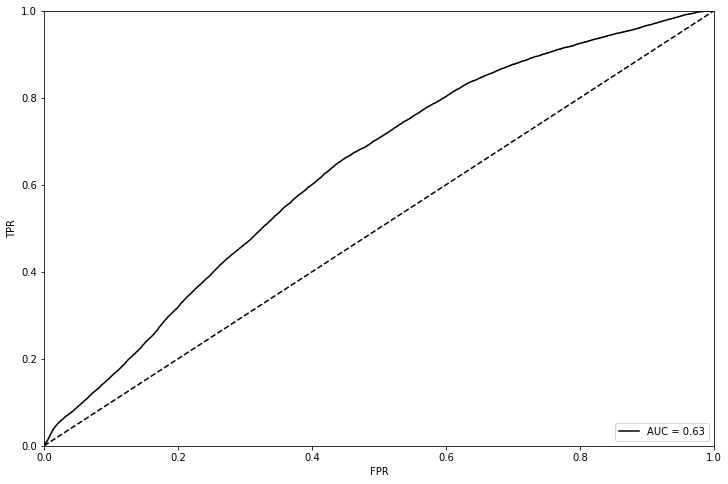

KstestResult(statistic=0.5120042192813685, pvalue=0.0)


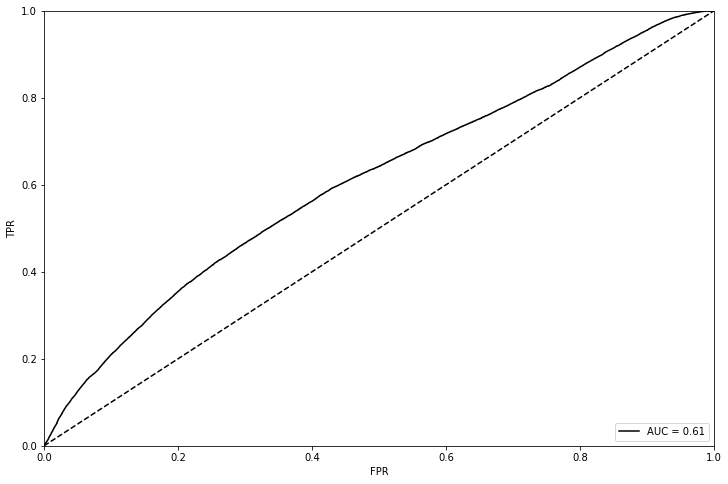

KstestResult(statistic=0.5171682120305645, pvalue=0.0)


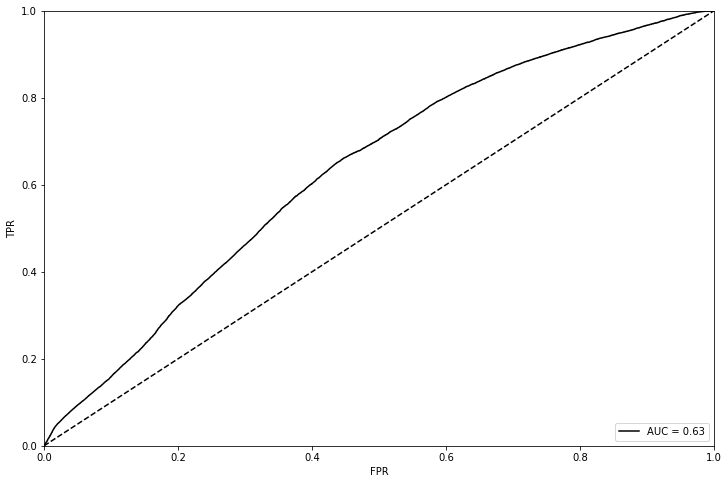

KstestResult(statistic=0.49990104852063866, pvalue=0.0)


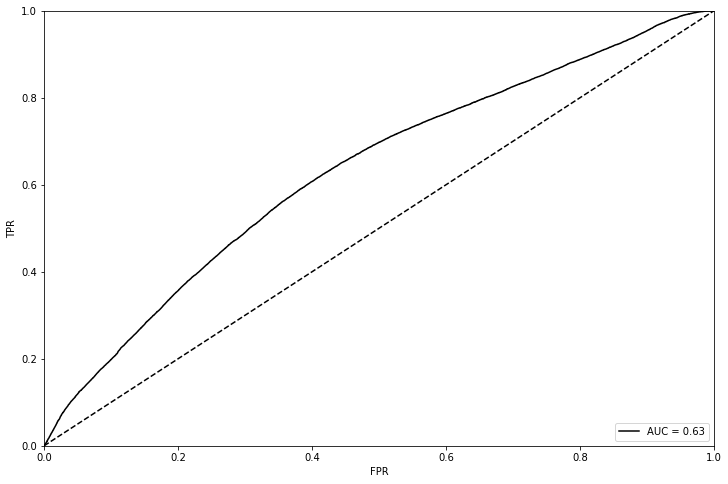

KstestResult(statistic=0.5217143199690166, pvalue=0.0)


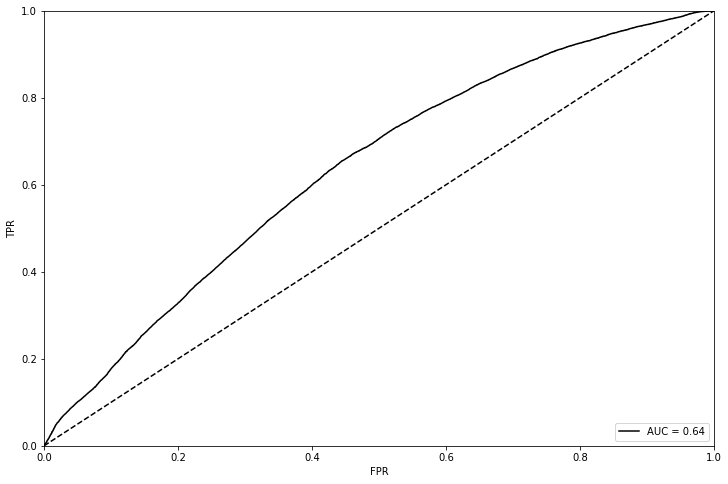

KstestResult(statistic=0.5213174529619043, pvalue=0.0)


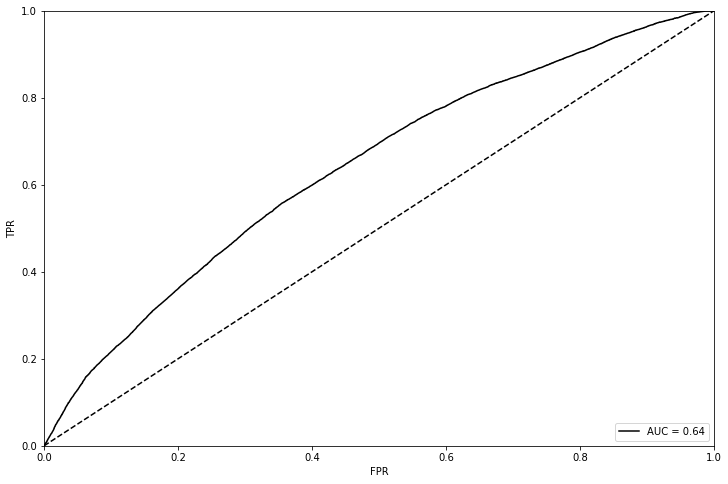

KstestResult(statistic=0.5206795016926162, pvalue=0.0)


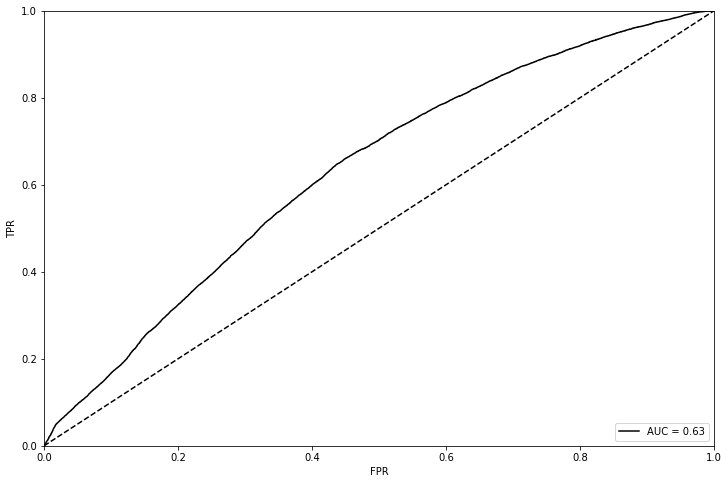

KstestResult(statistic=0.5173000117147613, pvalue=0.0)


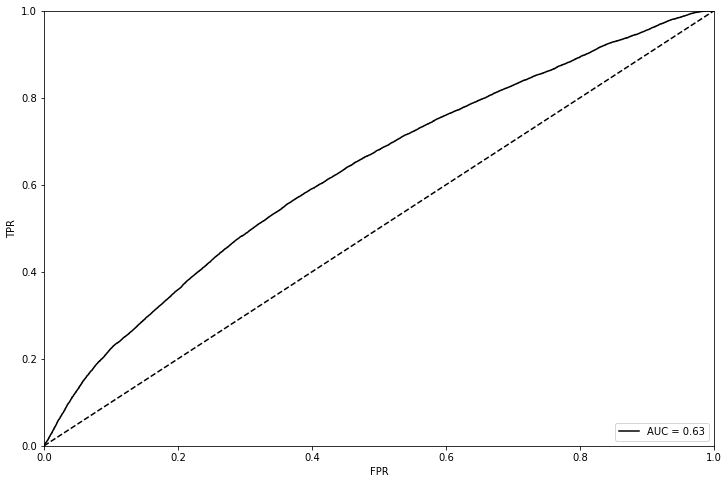

KstestResult(statistic=0.5204335862926572, pvalue=0.0)


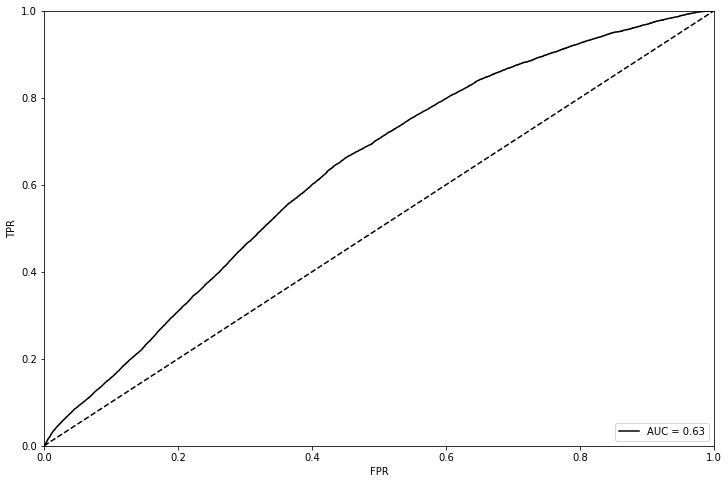

KstestResult(statistic=0.5214151715155254, pvalue=0.0)


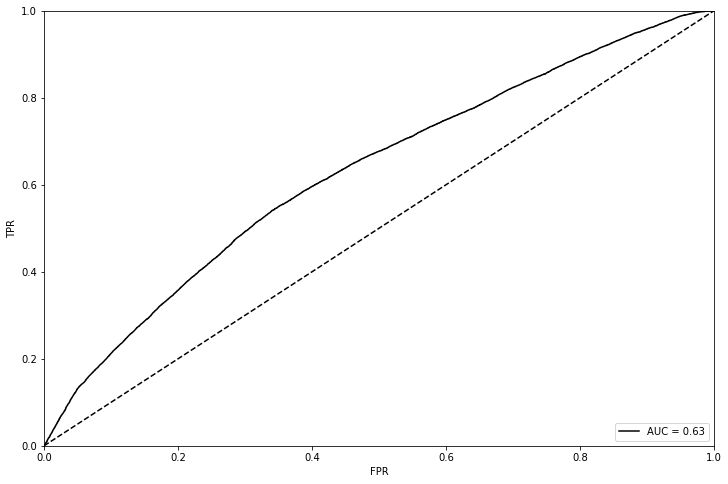

KstestResult(statistic=0.5178353284727081, pvalue=0.0)


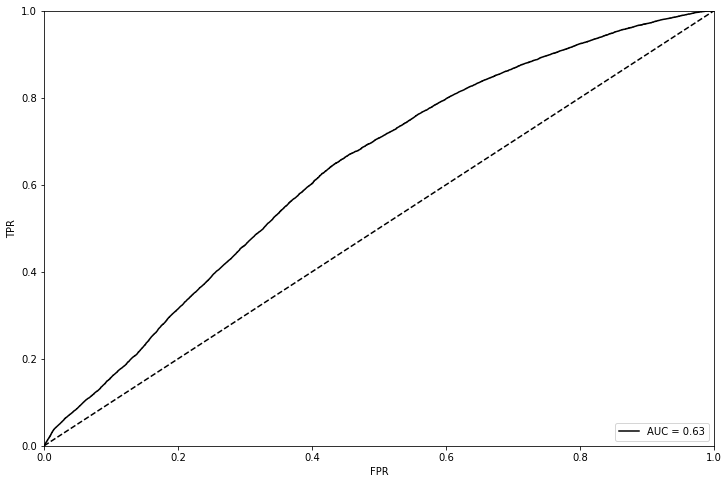

KstestResult(statistic=0.5266864034134848, pvalue=0.0)


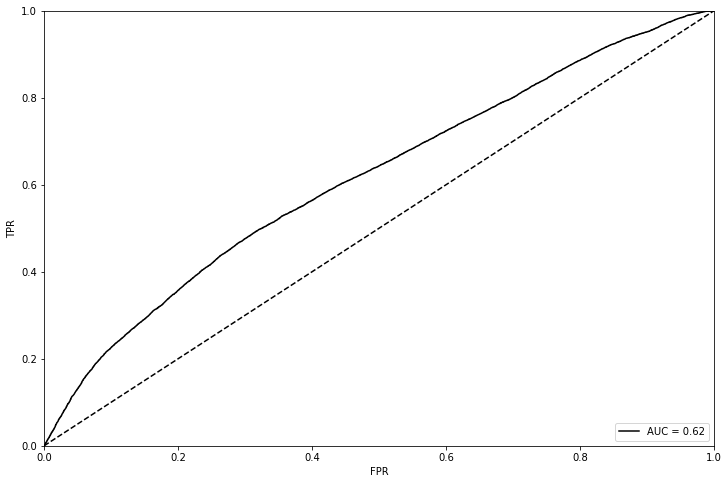

KstestResult(statistic=0.5188375356058249, pvalue=0.0)


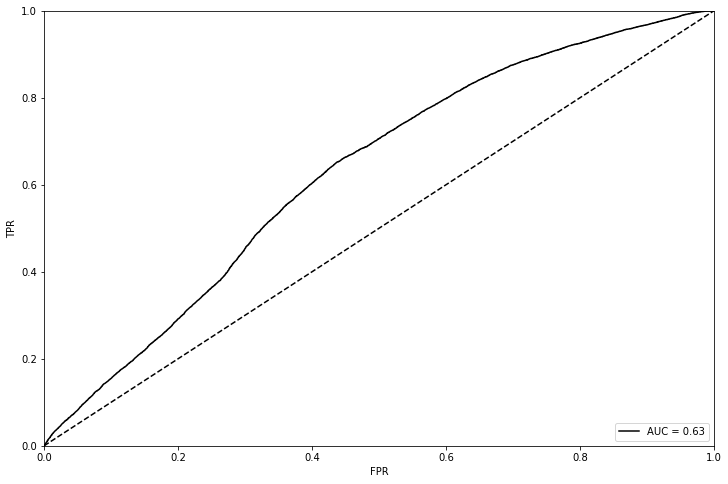

KstestResult(statistic=0.5173050266634781, pvalue=0.0)


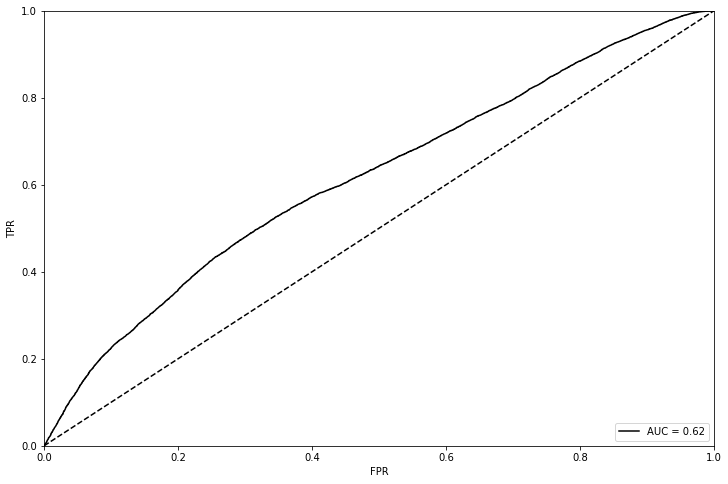

KstestResult(statistic=0.521571787548104, pvalue=0.0)


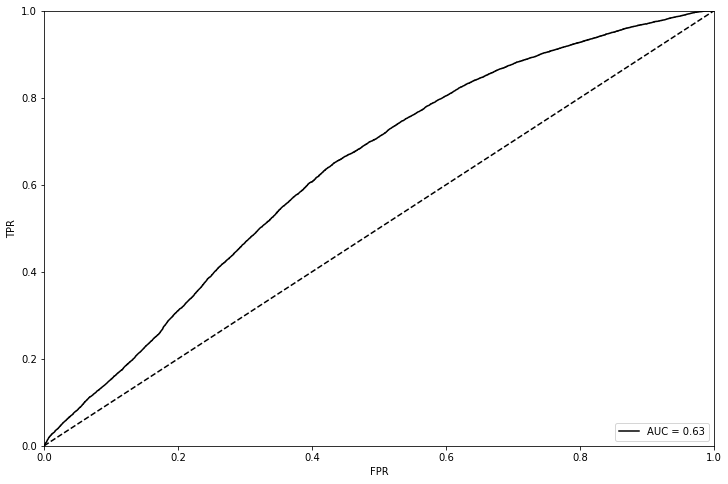

KstestResult(statistic=0.5210045861964308, pvalue=0.0)


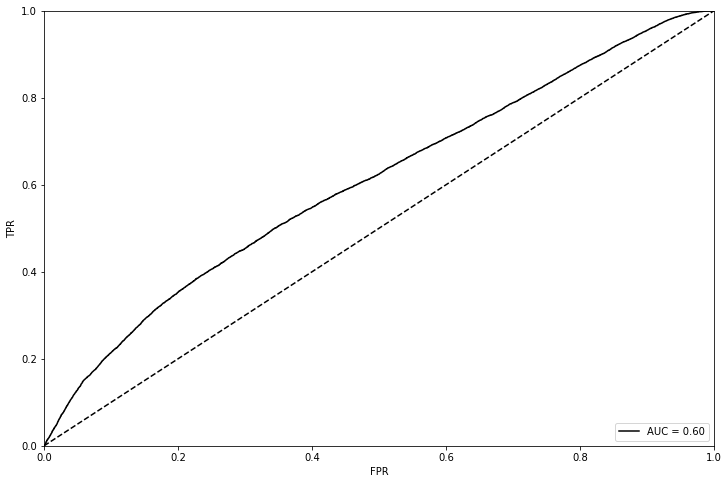

KstestResult(statistic=0.5179587108426332, pvalue=0.0)


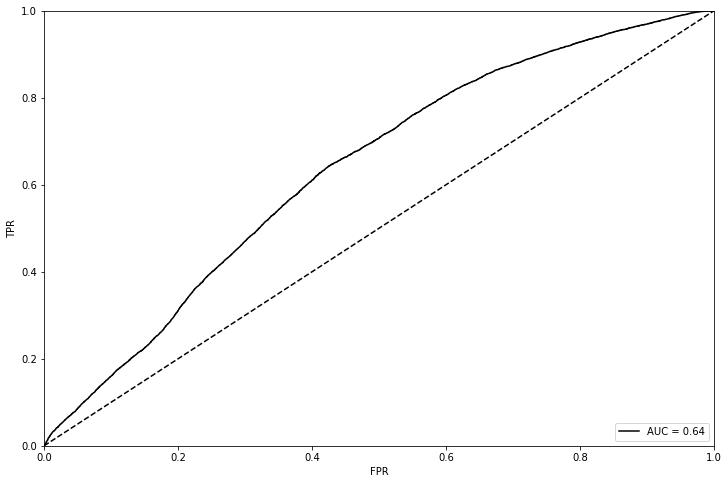

KstestResult(statistic=0.5069446359071931, pvalue=0.0)


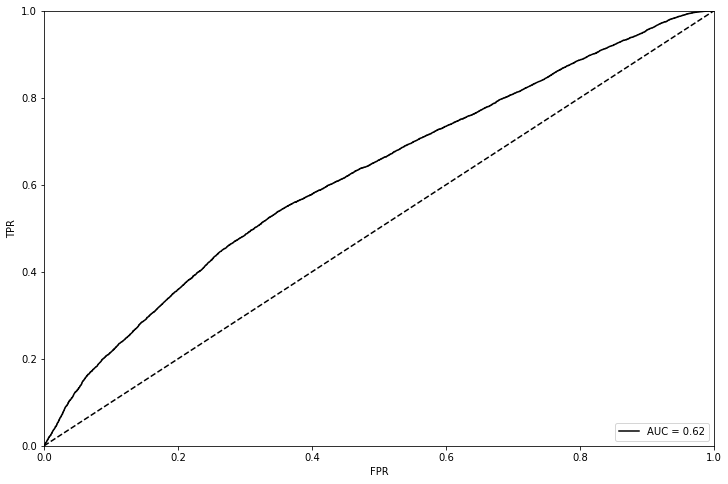

KstestResult(statistic=0.5208080748803324, pvalue=0.0)


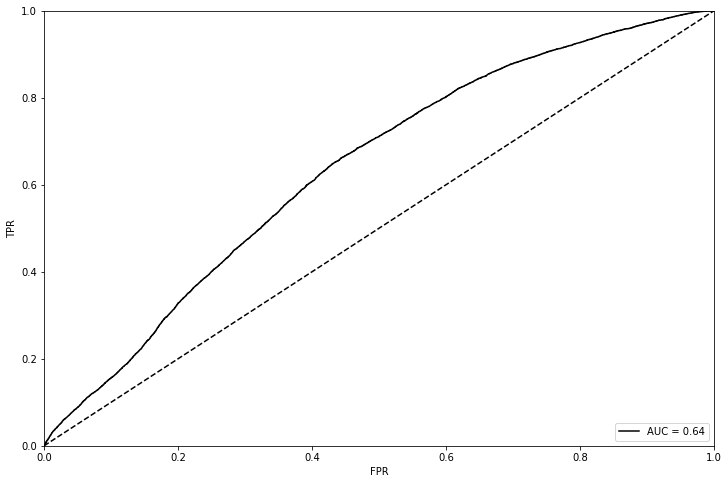

KstestResult(statistic=0.5200982465443824, pvalue=0.0)


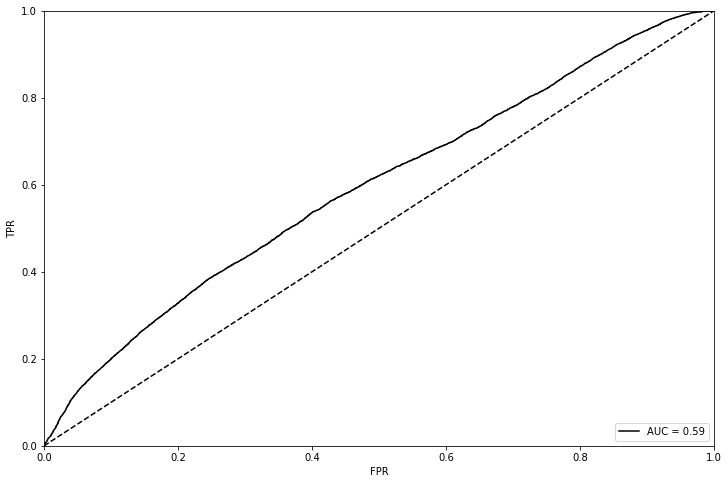

KstestResult(statistic=0.5159616459837809, pvalue=0.0)


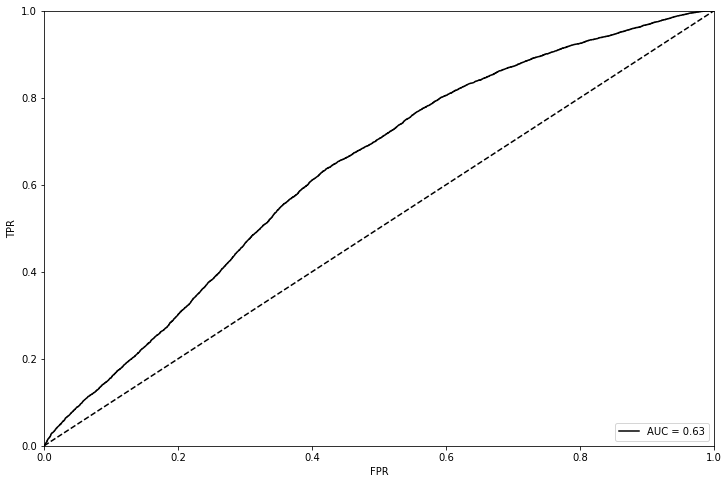

KstestResult(statistic=0.49316286001415666, pvalue=0.0)


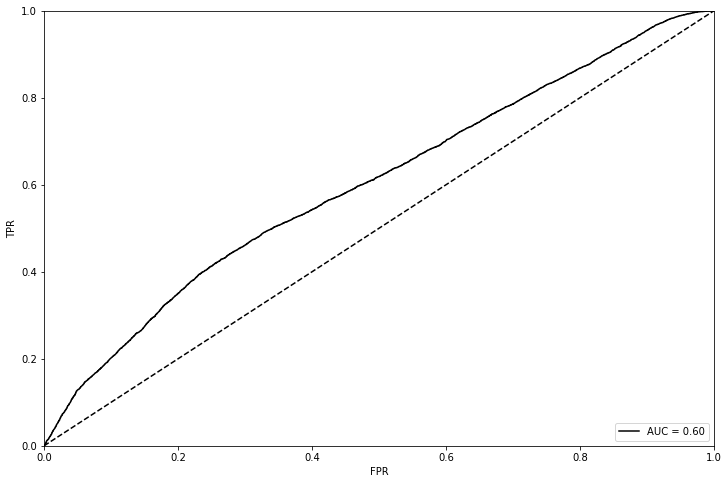

KstestResult(statistic=0.517191064639812, pvalue=0.0)


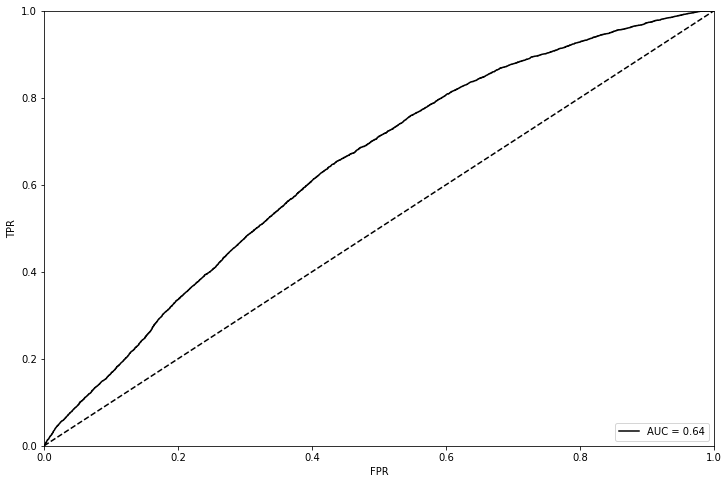

KstestResult(statistic=0.5053618514053753, pvalue=0.0)


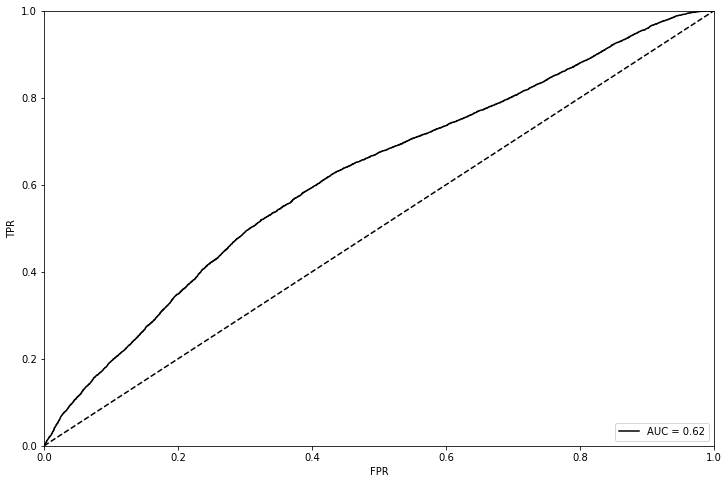

KstestResult(statistic=0.5193149477317811, pvalue=0.0)


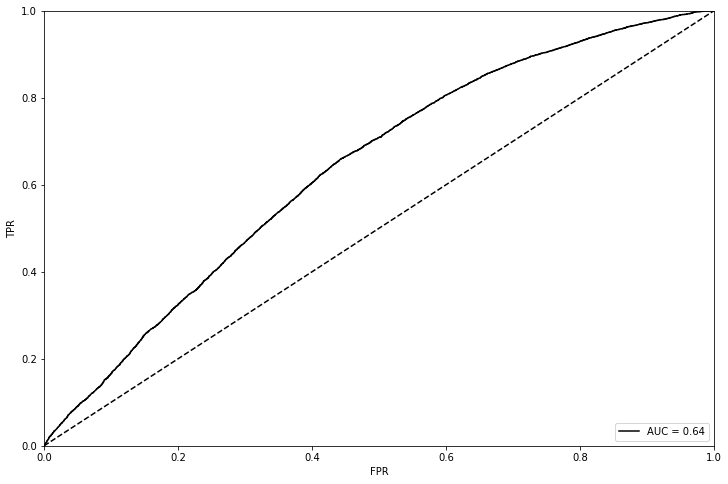

KstestResult(statistic=0.5205881152412696, pvalue=0.0)


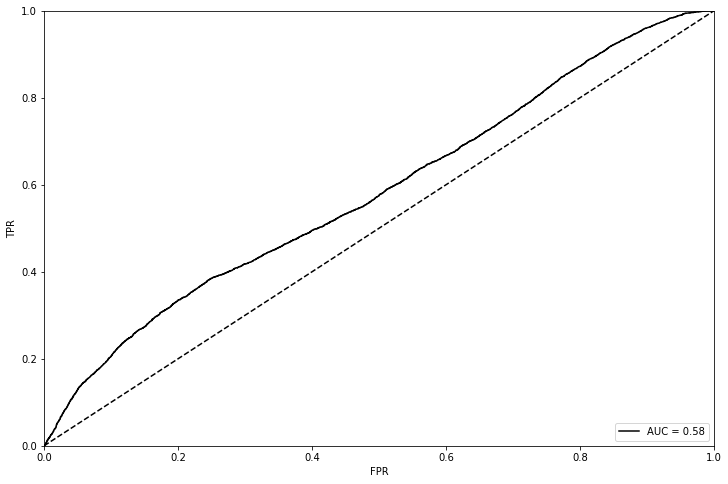

KstestResult(statistic=0.5208306590286891, pvalue=0.0)


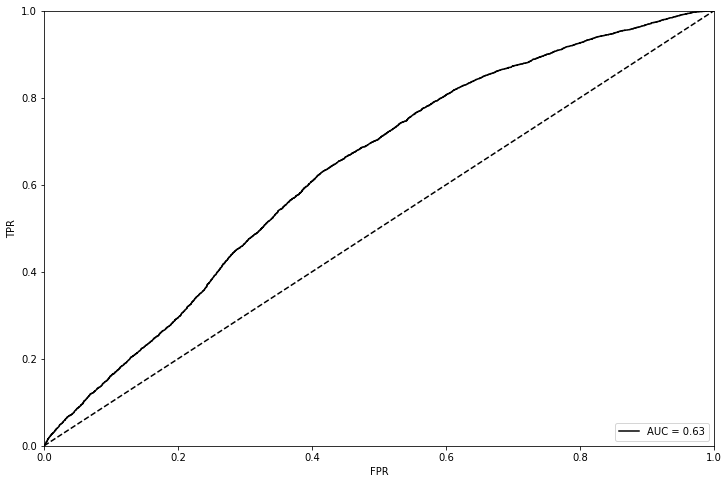

KstestResult(statistic=0.49756314668790214, pvalue=0.0)


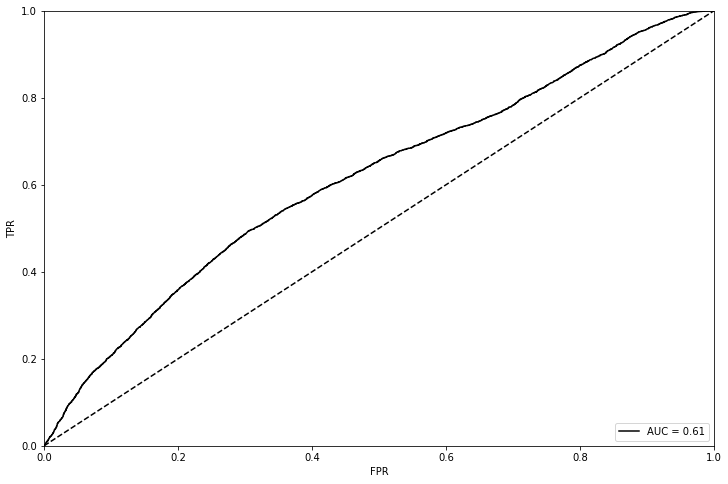

KstestResult(statistic=0.5260828201420036, pvalue=0.0)


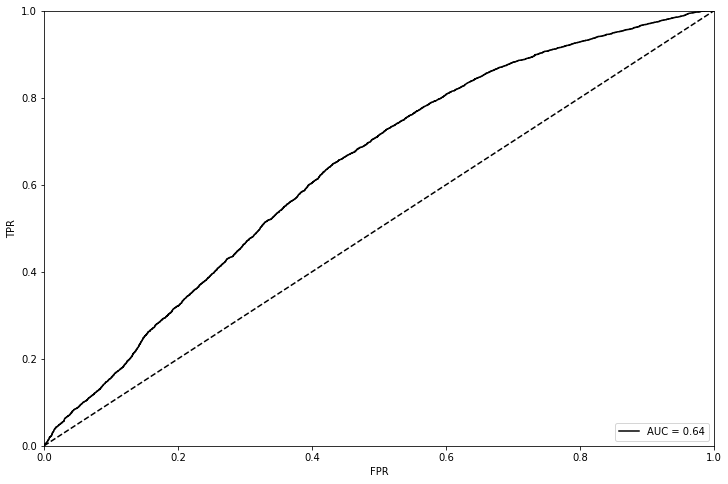

KstestResult(statistic=0.5211074605419621, pvalue=0.0)


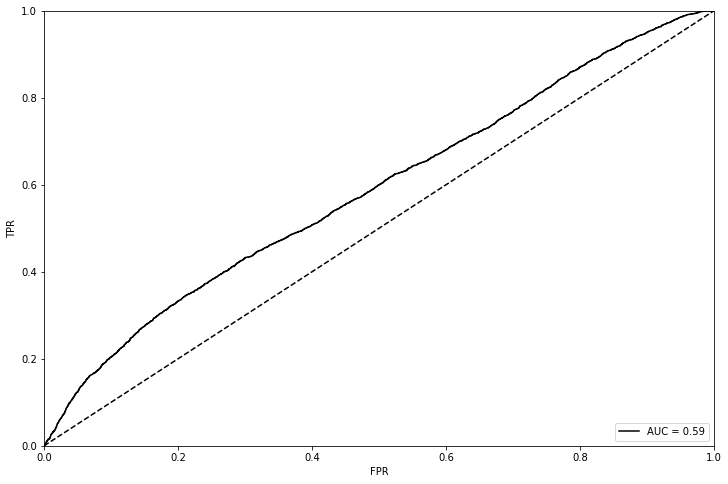

KstestResult(statistic=0.5211865776569362, pvalue=0.0)


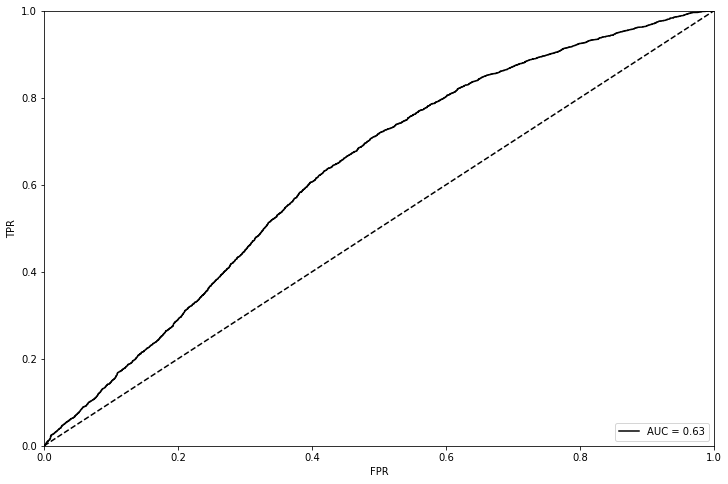

KstestResult(statistic=0.5032134689225329, pvalue=0.0)


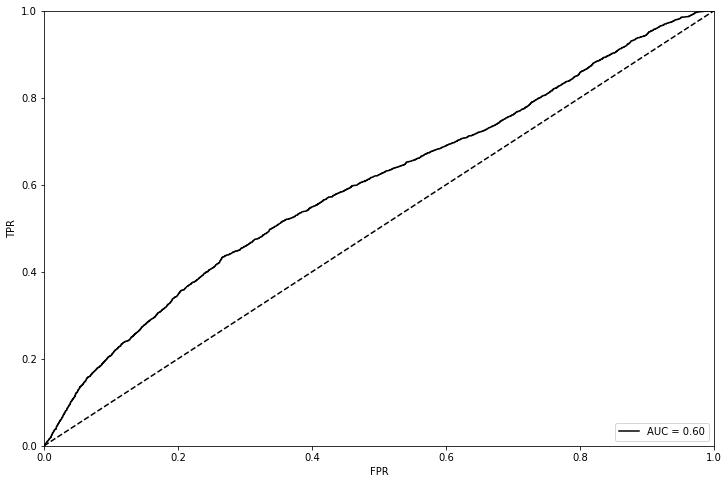

KstestResult(statistic=0.5188331016363448, pvalue=0.0)


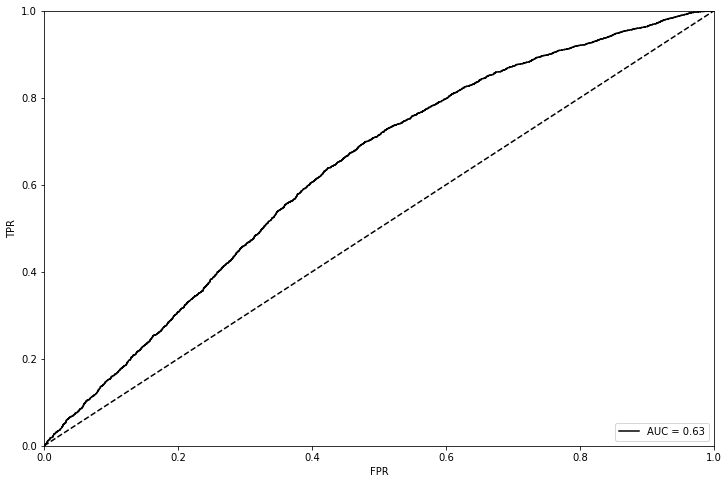

In [19]:
data = pd.concat([rep, non_rep], sort=True)

temperature = 1 
n_drop = 500

while True:
    rf = RandomForestClassifier(n_estimators=500, 
                                bootstrap=True,
                                max_depth=4,
                                oob_score=False)
        
    preds = cross_val_predict(rf, 
                              data.drop(['label', 'Above/Below 50K'], axis=1),
                              data['label'], 
                              cv=2,
                              method='predict_proba')
    
    data['preds'] = [p[0] for p in preds] 
    auc = roc(data.label, data.preds, 1, 'name')
    
    if len(data[data.label == 1]['preds']) < n_drop or len(data.label) < 10_000:
        break;
    else:
        for i in range(n_drop):
            softmax = sample(data[data.label == 1]['preds'], temperature)
            drop_id = np.argmax(softmax)
            data.drop(data.index[drop_id], inplace=True)

    print(kstest(data.preds, 'uniform'))

In [21]:
data

,Above/Below 50K,Age,Capital Gain,Capital Loss,Country_ ?,Country_ Cambodia,Country_ Canada,Country_ China,Country_ Columbia,Country_ Cuba,...,Workclass_ Local-gov,Workclass_ Never-worked,Workclass_ Private,Workclass_ Self-emp-inc,Workclass_ Self-emp-not-inc,Workclass_ State-gov,Workclass_ Without-pay,fnlgwt,label,preds
177,<=50K,34,0.0,0.0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,483777.0,0,0.711754
200,<=50K,26,0.0,1876.0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,397317.0,0,0.651499
265,>50K,37,0.0,0.0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,257295.0,0,0.550754
365,<=50K,28,0.0,0.0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,92262.0,0,0.596103
373,<=50K,45,0.0,0.0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,256649.0,0,0.584654
448,<=50K,20,0.0,0.0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,146538.0,0,0.601919
560,<=50K,28,0.0,0.0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,114053.0,0,0.662677
601,<=50K,19,0.0,0.0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,217039.0,0,0.732646
618,<=50K,52,0.0,0.0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,51048.0,0,0.525010
628,>50K,33,0.0,0.0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,205469.0,0,0.556571


In [23]:
data['Above/Below 50K'].value_counts()

 <=50K    6363
 >50K     2542
Name: Above/Below 50K, dtype: int64

## Results

**More/Less than 50K**

**Representative Sample:**
- more: 37155
- less: 11687
- 3.18 : 1


**Non-Representative Sample:**
- more: 21000
- less: 11687
- 1.80 : 1


**MRS corrected Sample:**
- more: 6363
- less: 2542
- 2.50 : 1